In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
df_chunk = pd.read_csv('train.csv', chunksize = 1000000, low_memory = False)
# chunk_list = []
count = 0
chunks = []
for chunk in df_chunk:
    #print(chunk.head(25))
#     print(chunk.describe())
#     print(chunk.isnull().sum())
    chunks.append(pd.DataFrame(chunk))
    count += 1
    break
# print(count)
# df_concat = pd.concat(chunk_list)

In [33]:
pd.DataFrame(df_chunk).head().dtypes()

KeyboardInterrupt: 

In [3]:
print(chunks[0].describe())



          fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  1000000.000000    1000000.000000   1000000.000000      999991.000000   
mean        11.343352        -72.521310        39.925188         -72.518306   
std          9.807783         13.036747         7.901750          13.401471   
min        -62.000000      -3007.205450     -3458.664702       -3383.296608   
25%          6.000000        -73.992092        40.734898         -73.991392   
50%          8.500000        -73.981823        40.752657         -73.980150   
75%         12.500000        -73.967111        40.767103         -73.963687   
max        495.000000       2434.238557      2009.266280        3382.125693   

       dropoff_latitude  passenger_count  
count     999991.000000   1000000.000000  
mean          39.925168         1.683403  
std           11.382385         1.306486  
min        -3461.540872         0.000000  
25%           40.734000         1.000000  
50%           40.753122       

In [4]:
print(chunks[0].isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    9
dropoff_latitude     9
passenger_count      0
dtype: int64


In [16]:
chunks[0].head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-10-20 23:26:26.0000003,4.5,2010-10-20 23:26:26 UTC,-73.98691,40.739538,-73.991381,40.745614,2
1,2009-12-30 10:56:00.00000075,4.1,2009-12-30 10:56:00 UTC,-73.961572,40.760283,-73.957438,40.769387,5
2,2012-07-20 11:24:00.00000022,6.1,2012-07-20 11:24:00 UTC,-73.979437,40.746517,-73.984195,40.732116999999995,1
3,2011-05-31 11:29:00.000000136,4.9,2011-05-31 11:29:00 UTC,-73.964097,40.792508000000005,-73.976422,40.785767,1
4,2010-05-25 17:57:00.000000145,6.5,2010-05-25 17:57:00 UTC,-74.003943,40.72567,-73.988915,40.74837,1


AxesSubplot(0.125,0.125;0.775x0.755)


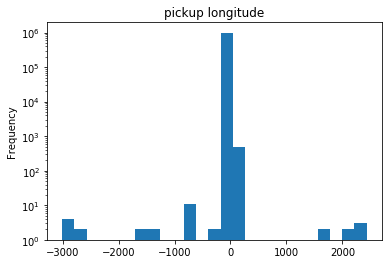

In [26]:
fig, ax = plt.subplots()
print(chunks[0]["pickup_longitude"].plot.hist(ax = ax, title="pickup longitude",bottom=1, bins=25))
ax.set_yscale('log')
# plot1 = chunks[0]['pickup_longitude']
# plot1.plot.hist(grid=True, bins=1, rwidth=0.9, color='#607c8e')
# plt.xlabel('Pregnancies')
# plt.grid(axis='y')

AxesSubplot(0.125,0.125;0.775x0.755)


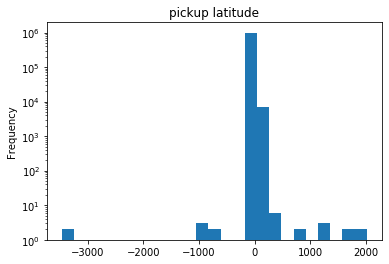

In [27]:
fig, ax = plt.subplots()
print(chunks[0]["pickup_latitude"].plot.hist(ax = ax, title="pickup latitude",bottom=1, bins=25))
ax.set_yscale('log')

AxesSubplot(0.125,0.125;0.775x0.755)


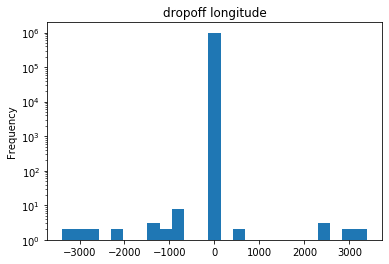

In [28]:
fig, ax = plt.subplots()
print(chunks[0]["dropoff_longitude"].plot.hist(ax = ax, title="dropoff longitude",bottom=1, bins=25))
ax.set_yscale('log')

AxesSubplot(0.125,0.125;0.775x0.755)


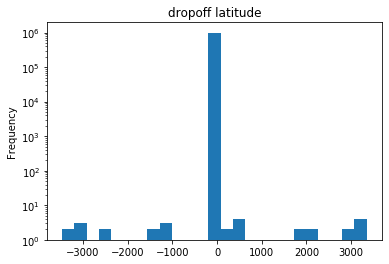

In [29]:
fig, ax = plt.subplots()
print(chunks[0]["dropoff_latitude"].plot.hist(ax = ax, title="dropoff latitude",bottom=1, bins=25))
ax.set_yscale('log')

AxesSubplot(0.125,0.125;0.775x0.755)


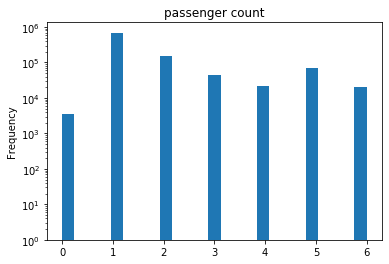

In [30]:
fig, ax = plt.subplots()
print(chunks[0]["passenger_count"].plot.hist(ax = ax, title="passenger count",bottom=1, bins=25))
ax.set_yscale('log')